<a href="https://colab.research.google.com/github/chandc/Mobile_Upload/blob/master/Mobile_Upload_All.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%config IPCompleter.greedy=True
!python --version

Python 3.6.8


In [2]:
from google.colab import  files
uploaded = files.upload()

Saving Validations and Submissions as of 11012019 4_37_PM.csv to Validations and Submissions as of 11012019 4_37_PM (1).csv


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import io
%matplotlib inline

!pwd
!ls

/content
 sample_data
'Validations and Submissions as of 11012019 4_37_PM (1).csv'
'Validations and Submissions as of 11012019 4_37_PM.csv'


In [0]:
df = pd.read_csv(io.BytesIO(uploaded['Validations and Submissions as of 11012019 4_37_PM.csv']), index_col=None)

In [5]:
df.head(2)

,MOBILE_APP_REQUEST_ID,INSERT_TS,RESPONSE_STATUS_ID,DEVICE,DEVICE_OS,RESPONSE_STATUS_NAME,MOBILE_SUBMISSION_ID,Size,Page Count,INSERT_TS.1,LAST_UPDATE_TS,CLIENT_VERSION
0,338,2019-10-28 02:02:27,300100,iPhone 6s Plus,13.1.3,Successful validation.,NaN,NaN,NaN,2019-10-28 02:02:27,2019-10-28 02:02:29,1.0.201910230000.2
1,343,2019-10-28 07:25:18,300100,SM-N960U1,28,Successful validation.,NaN,NaN,NaN,2019-10-28 07:25:18,2019-10-28 07:25:21,1.0


In [6]:
df.shape

(4433, 12)

In [7]:
df.dtypes

MOBILE_APP_REQUEST_ID     int64
INSERT_TS                object
RESPONSE_STATUS_ID        int64
DEVICE                   object
DEVICE_OS                object
RESPONSE_STATUS_NAME     object
MOBILE_SUBMISSION_ID     object
Size                     object
Page Count               object
INSERT_TS.1              object
LAST_UPDATE_TS           object
CLIENT_VERSION           object
dtype: object

In [0]:
# convert INSERT_TS, INSERT_TS.1 and LAST_UPDATE_TS to datetime
df['INSERT_TS'] = pd.to_datetime(df['INSERT_TS'])
df['INSERT_TS.1'] = pd.to_datetime(df['INSERT_TS.1'])
df['LAST_UPDATE_TS'] = pd.to_datetime(df['LAST_UPDATE_TS'])

In [9]:
df.dtypes

MOBILE_APP_REQUEST_ID             int64
INSERT_TS                datetime64[ns]
RESPONSE_STATUS_ID                int64
DEVICE                           object
DEVICE_OS                        object
RESPONSE_STATUS_NAME             object
MOBILE_SUBMISSION_ID             object
Size                             object
Page Count                       object
INSERT_TS.1              datetime64[ns]
LAST_UPDATE_TS           datetime64[ns]
CLIENT_VERSION                   object
dtype: object

In [10]:
df['INSERT_TS'].dt.time

0       02:02:27
1       07:25:18
2       08:05:07
3       08:32:42
4       08:33:43
          ...   
4428    16:31:33
4429    16:31:45
4430    16:32:22
4431    16:32:42
4432    16:33:05
Name: INSERT_TS, Length: 4433, dtype: object

In [11]:
df.tail(2)

,MOBILE_APP_REQUEST_ID,INSERT_TS,RESPONSE_STATUS_ID,DEVICE,DEVICE_OS,RESPONSE_STATUS_NAME,MOBILE_SUBMISSION_ID,Size,Page Count,INSERT_TS.1,LAST_UPDATE_TS,CLIENT_VERSION
4431,10894,2019-11-01 16:32:42,300100,iPhone 8 Plus,13.1.3,Successful validation.,NaN,NaN,NaN,2019-11-01 16:32:42,2019-11-01 16:32:42,1.0.201910230000.2
4432,10897,2019-11-01 16:33:05,300100,iPhone 8,13.1.2,Successful validation.,NaN,NaN,NaN,2019-11-01 16:33:05,2019-11-01 16:33:07,1.0.201910230000.2


In [12]:
df = df.drop(columns=[ "MOBILE_APP_REQUEST_ID", "INSERT_TS.1", "MOBILE_SUBMISSION_ID"])
df.head()

,INSERT_TS,RESPONSE_STATUS_ID,DEVICE,DEVICE_OS,RESPONSE_STATUS_NAME,Size,Page Count,LAST_UPDATE_TS,CLIENT_VERSION
0,2019-10-28 02:02:27,300100,iPhone 6s Plus,13.1.3,Successful validation.,NaN,NaN,2019-10-28 02:02:29,1.0.201910230000.2
1,2019-10-28 07:25:18,300100,SM-N960U1,28,Successful validation.,NaN,NaN,2019-10-28 07:25:21,1.0
2,2019-10-28 08:05:07,300100,SM-G960U,28,Successful validation.,NaN,NaN,2019-10-28 08:05:12,1.0
3,2019-10-28 08:32:42,300100,SM-G960U,28,Successful validation.,NaN,NaN,2019-10-28 08:32:46,1.0
4,2019-10-28 08:33:43,300200,SM-G960U,28,INFORMATION_NOT_VERIFIED_TITLE,NaN,NaN,2019-10-28 08:33:47,1.0


### Extract page counts and submission sizes


In [0]:
df["Page Count"] = df["Page Count"].str.extract(r'\b(\w+)$', expand=True)

In [14]:
df["Size"] = df["Size"].str.extract(r'\b(\w+)$', expand=True)
df.head(20)

,INSERT_TS,RESPONSE_STATUS_ID,DEVICE,DEVICE_OS,RESPONSE_STATUS_NAME,Size,Page Count,LAST_UPDATE_TS,CLIENT_VERSION
0,2019-10-28 02:02:27,300100,iPhone 6s Plus,13.1.3,Successful validation.,NaN,NaN,2019-10-28 02:02:29,1.0.201910230000.2
1,2019-10-28 07:25:18,300100,SM-N960U1,28,Successful validation.,NaN,NaN,2019-10-28 07:25:21,1.0
2,2019-10-28 08:05:07,300100,SM-G960U,28,Successful validation.,NaN,NaN,2019-10-28 08:05:12,1.0
3,2019-10-28 08:32:42,300100,SM-G960U,28,Successful validation.,NaN,NaN,2019-10-28 08:32:46,1.0
4,2019-10-28 08:33:43,300200,SM-G960U,28,INFORMATION_NOT_VERIFIED_TITLE,NaN,NaN,2019-10-28 08:33:47,1.0
5,2019-10-28 08:34:22,300100,SM-G960U,28,Successful validation.,NaN,NaN,2019-10-28 08:34:22,1.0
6,2019-10-28 08:57:13,300100,iPhone XS Max,13.1.3,Successful validation.,NaN,NaN,2019-10-28 08:57:17,1.0.201910230000.2
7,2019-10-28 08:59:24,300100,iPhone XR,13.1.2,Successful validation.,NaN,NaN,2019-10-28 08:59:28,1.0.201910230000.2
8,2019-10-28 08:59:28,400205,iPhone XS Max,13.1.3,Invalid image content,10155392,4,2019-10-28 08:59:29,1.0.201910230000.2
9,2019-10-28 09:00:34,400205,iPhone XS Max,13.1.3,Invalid image content,10155392,4,2019-10-28 09:00:35,1.0.201910230000.2


In [15]:
df.dtypes

INSERT_TS               datetime64[ns]
RESPONSE_STATUS_ID               int64
DEVICE                          object
DEVICE_OS                       object
RESPONSE_STATUS_NAME            object
Size                            object
Page Count                      object
LAST_UPDATE_TS          datetime64[ns]
CLIENT_VERSION                  object
dtype: object

In [16]:
df["Size"] = pd.to_numeric(df.Size)
df["Page Count"] = pd.to_numeric(df["Page Count"])
df.dtypes

INSERT_TS               datetime64[ns]
RESPONSE_STATUS_ID               int64
DEVICE                          object
DEVICE_OS                       object
RESPONSE_STATUS_NAME            object
Size                           float64
Page Count                     float64
LAST_UPDATE_TS          datetime64[ns]
CLIENT_VERSION                  object
dtype: object

In [0]:
df["Size"].fillna(0, inplace=True)
df["Page Count"].fillna(0, inplace=True)

In [18]:
df["Size"] = df["Size"].astype(int)
df["Page Count"] = df["Page Count"].astype(int)
df.head(10)


,INSERT_TS,RESPONSE_STATUS_ID,DEVICE,DEVICE_OS,RESPONSE_STATUS_NAME,Size,Page Count,LAST_UPDATE_TS,CLIENT_VERSION
0,2019-10-28 02:02:27,300100,iPhone 6s Plus,13.1.3,Successful validation.,0,0,2019-10-28 02:02:29,1.0.201910230000.2
1,2019-10-28 07:25:18,300100,SM-N960U1,28,Successful validation.,0,0,2019-10-28 07:25:21,1.0
2,2019-10-28 08:05:07,300100,SM-G960U,28,Successful validation.,0,0,2019-10-28 08:05:12,1.0
3,2019-10-28 08:32:42,300100,SM-G960U,28,Successful validation.,0,0,2019-10-28 08:32:46,1.0
4,2019-10-28 08:33:43,300200,SM-G960U,28,INFORMATION_NOT_VERIFIED_TITLE,0,0,2019-10-28 08:33:47,1.0
5,2019-10-28 08:34:22,300100,SM-G960U,28,Successful validation.,0,0,2019-10-28 08:34:22,1.0
6,2019-10-28 08:57:13,300100,iPhone XS Max,13.1.3,Successful validation.,0,0,2019-10-28 08:57:17,1.0.201910230000.2
7,2019-10-28 08:59:24,300100,iPhone XR,13.1.2,Successful validation.,0,0,2019-10-28 08:59:28,1.0.201910230000.2
8,2019-10-28 08:59:28,400205,iPhone XS Max,13.1.3,Invalid image content,10155392,4,2019-10-28 08:59:29,1.0.201910230000.2
9,2019-10-28 09:00:34,400205,iPhone XS Max,13.1.3,Invalid image content,10155392,4,2019-10-28 09:00:35,1.0.201910230000.2


In [19]:
print ("Number of Unsuccessful Logins: ",df[ df["RESPONSE_STATUS_ID"] == 300200 ].shape[0])
print ("Number of Successful Logins: ",df[ df["RESPONSE_STATUS_ID"] == 300100 ].shape[0])
df_submit = df[ df["RESPONSE_STATUS_ID"] == 400100 ]["Page Count"]
print ("Number of Submissions: ",df_submit.shape[0])
print ("Number of Pages Submitted: ",df["Page Count"].sum())
print ("Number of iOS Devices:", df[ df["CLIENT_VERSION"] == "1.0.201910230000.2" ].shape[0] )
print ("Number of Android Devices:", df[ df["CLIENT_VERSION"] == "1.0" ].shape[0]  )

Number of Unsuccessful Logins:  1119
Number of Successful Logins:  1844
Number of Submissions:  1439
Number of Pages Submitted:  2311
Number of iOS Devices: 2893
Number of Android Devices: 1533


In [20]:
df_submit.describe()


count    1439.000000
mean        1.505907
std         1.008207
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        10.000000
Name: Page Count, dtype: float64

In [21]:
df["Size"]/1000000.

0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
          ...   
4428    3.689664
4429    1.669504
4430    2.684432
4431    0.000000
4432    0.000000
Name: Size, Length: 4433, dtype: float64

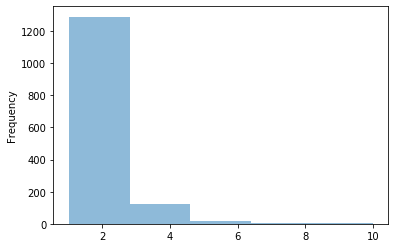

In [22]:
df_submit.plot.hist(bins=5, alpha=0.5)

In [23]:
device = df.groupby(["DEVICE"])["DEVICE"].count()
device = device.sort_values(ascending = False).head(20)
device

DEVICE
iPhone XR         510
iPhone 8 Plus     416
iPhone 7 Plus     299
iPhone XS Max     262
iPhone X          261
iPhone 7          231
iPhone 8          184
iPhone 6s Plus    137
iPhone 6s         125
SM-G960U          114
SM-N950U          101
iPhone12,1         91
iPhone XS          91
SM-N960U           84
iPhone12,5         84
SM-G965U           79
SM-G975U           65
iPhone 6           60
SM-G950U           59
SM-G955U           45
Name: DEVICE, dtype: int64

In [24]:
logins = df[ (df["RESPONSE_STATUS_ID"] == 300200) | (df["RESPONSE_STATUS_ID"] == 300100) ]
print ('number of logins: ',logins.shape[0])

number of logins:  2963


In [25]:
df.groupby(["RESPONSE_STATUS_NAME"])["RESPONSE_STATUS_NAME"].count()

RESPONSE_STATUS_NAME
Documents successfully submitted.                1439
INFORMATION_NOT_VERIFIED_TITLE                   1119
Invalid image content                              27
Successful validation.                           1844
Unable to validate consumer message received.       4
Name: RESPONSE_STATUS_NAME, dtype: int64

In [0]:
df[ (df["DEVICE"] == "iPhone 5s") ]

,INSERT_TS,RESPONSE_STATUS_ID,DEVICE,DEVICE_OS,MOBILE_SUBMISSION_ID,Size,Page Count,LAST_UPDATE_TS,CLIENT_VERSION


In [0]:
iP8 = logins[ (logins["DEVICE"]=="iPhone 8 Plus") & (logins["RESPONSE_STATUS_ID"] == 300100) ]

In [0]:
iP8["Time_Lag"] = iP8["INSERT_TS"] - iP8["INSERT_TS"].shift(1) 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
iP8["Time_Lag"].dt.total_seconds()

7          NaN
32     20625.0
123     9829.0
183     2281.0
188      476.0
192       72.0
249     1852.0
323     2701.0
353     1063.0
354       34.0
365      233.0
377      525.0
385      398.0
476     3563.0
488      262.0
505      445.0
510      138.0
589     3321.0
608      688.0
610      127.0
729     4112.0
755      731.0
807     1953.0
818      236.0
826      256.0
836      235.0
Name: Time_Lag, dtype: float64

In [0]:
iP8["Time_Lag"]

7          NaT
32    05:43:45
123   02:43:49
183   00:38:01
188   00:07:56
192   00:01:12
249   00:30:52
323   00:45:01
353   00:17:43
354   00:00:34
365   00:03:53
377   00:08:45
385   00:06:38
476   00:59:23
488   00:04:22
505   00:07:25
510   00:02:18
589   00:55:21
608   00:11:28
610   00:02:07
729   01:08:32
755   00:12:11
807   00:32:33
818   00:03:56
826   00:04:16
836   00:03:55
Name: Time_Lag, dtype: timedelta64[ns]

In [0]:
df.head(20)

,INSERT_TS,RESPONSE_STATUS_ID,DEVICE,DEVICE_OS,MOBILE_SUBMISSION_ID,Size,Page Count,LAST_UPDATE_TS,CLIENT_VERSION
0,2019-10-30 00:10:13,300100,iPhone XR,12.3.1,NaN,0,0,2019-10-30 00:10:13,1.0.201910230000.2
1,2019-10-30 00:14:26,300100,SM-G965U,28,NaN,0,0,2019-10-30 00:14:32,1.0
2,2019-10-30 00:42:37,300200,iPhone XS Max,13.1.3,NaN,0,0,2019-10-30 00:42:51,1.0.201910230000.2
3,2019-10-30 00:51:40,300100,iPhone 7,13.1.3,NaN,0,0,2019-10-30 00:51:44,1.0.201910230000.2
4,2019-10-30 01:05:18,300100,iPhone XR,13.1.3,NaN,0,0,2019-10-30 01:05:22,1.0.201910230000.2
5,2019-10-30 01:10:44,400100,iPhone XR,13.1.3,686dacaa-dbf8-4576-9d0e-b7e513b838ee,5994640,8,2019-10-30 01:10:45,1.0.201910230000.2
6,2019-10-30 01:14:16,300100,iPhone XR,13.1.3,NaN,0,0,2019-10-30 01:14:16,1.0.201910230000.2
7,2019-10-30 01:47:51,300100,iPhone 8 Plus,13.1.3,NaN,0,0,2019-10-30 01:47:53,1.0.201910230000.2
8,2019-10-30 01:51:54,400100,iPhone 8 Plus,13.1.3,e7951869-9ac9-4182-9b1b-9c76a1a2b896,4546592,2,2019-10-30 01:51:56,1.0.201910230000.2
9,2019-10-30 02:36:56,300200,REVVLPLUS C3701A,25,NaN,0,0,2019-10-30 02:36:59,1.0


In [0]:
df_Copy = df.copy()

In [0]:
df["RESPONSE_STATUS_ID"] = df["RESPONSE_STATUS_ID"].replace( [300200,300100,300202,400205,400100,], [1,2,3,4,5])

In [0]:
df.groupby(["RESPONSE_STATUS_ID"])["RESPONSE_STATUS_ID"].count()

RESPONSE_STATUS_ID
1    219
2    362
5    292
Name: RESPONSE_STATUS_ID, dtype: int64

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 873 entries, 0 to 872
Data columns (total 9 columns):
INSERT_TS               873 non-null datetime64[ns]
RESPONSE_STATUS_ID      873 non-null int64
DEVICE                  873 non-null object
DEVICE_OS               873 non-null object
MOBILE_SUBMISSION_ID    292 non-null object
Size                    873 non-null int64
Page Count              873 non-null int64
LAST_UPDATE_TS          873 non-null datetime64[ns]
CLIENT_VERSION          873 non-null object
dtypes: datetime64[ns](2), int64(3), object(4)
memory usage: 61.5+ KB


In [0]:
df.set_index("INSERT_TS", inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 873 entries, 2019-10-30 00:10:13 to 2019-10-30 17:45:30
Data columns (total 8 columns):
RESPONSE_STATUS_ID      873 non-null int64
DEVICE                  873 non-null object
DEVICE_OS               873 non-null object
MOBILE_SUBMISSION_ID    292 non-null object
Size                    873 non-null int64
Page Count              873 non-null int64
LAST_UPDATE_TS          873 non-null datetime64[ns]
CLIENT_VERSION          873 non-null object
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 61.4+ KB


In [0]:
df.head(20)

,RESPONSE_STATUS_ID,DEVICE,DEVICE_OS,MOBILE_SUBMISSION_ID,Size,Page Count,LAST_UPDATE_TS,CLIENT_VERSION
INSERT_TS,,,,,,,,
2019-10-30 00:10:13,2,iPhone XR,12.3.1,NaN,0,0,2019-10-30 00:10:13,1.0.201910230000.2
2019-10-30 00:14:26,2,SM-G965U,28,NaN,0,0,2019-10-30 00:14:32,1.0
2019-10-30 00:42:37,1,iPhone XS Max,13.1.3,NaN,0,0,2019-10-30 00:42:51,1.0.201910230000.2
2019-10-30 00:51:40,2,iPhone 7,13.1.3,NaN,0,0,2019-10-30 00:51:44,1.0.201910230000.2
2019-10-30 01:05:18,2,iPhone XR,13.1.3,NaN,0,0,2019-10-30 01:05:22,1.0.201910230000.2
2019-10-30 01:10:44,5,iPhone XR,13.1.3,686dacaa-dbf8-4576-9d0e-b7e513b838ee,5994640,8,2019-10-30 01:10:45,1.0.201910230000.2
2019-10-30 01:14:16,2,iPhone XR,13.1.3,NaN,0,0,2019-10-30 01:14:16,1.0.201910230000.2
2019-10-30 01:47:51,2,iPhone 8 Plus,13.1.3,NaN,0,0,2019-10-30 01:47:53,1.0.201910230000.2
2019-10-30 01:51:54,5,iPhone 8 Plus,13.1.3,e7951869-9ac9-4182-9b1b-9c76a1a2b896,4546592,2,2019-10-30 01:51:56,1.0.201910230000.2


In [0]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 4)})



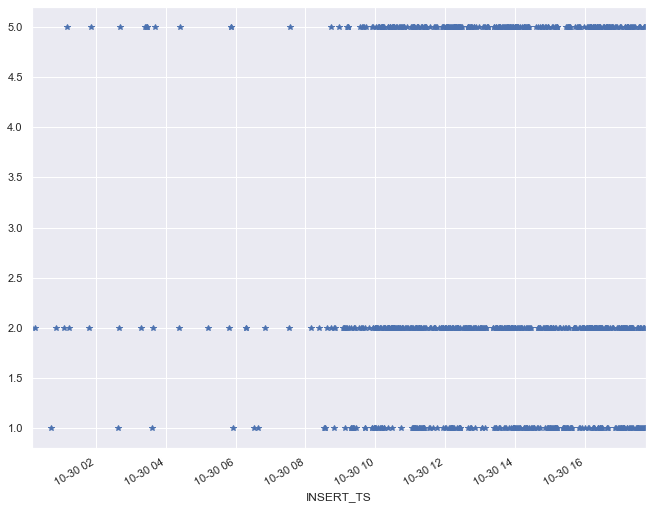

In [0]:
#df["RESPONSE_STATUS_ID"].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True))

df["RESPONSE_STATUS_ID"].plot(marker='*', linestyle='None',figsize=(11, 9))